<a href="https://colab.research.google.com/github/josueisaihs/PythonPractice/blob/main/churn_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Churn Modelling
Red Neuronal para la clasificación de clientes de una entidad bancaria

In [70]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import random_split, TensorDataset
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

# Set de datos
Carga del set de datos


In [71]:
url = 'https://raw.githubusercontent.com/josueisaihs/PytorchTutorial/main/Churn_Modelling.csv'
data = pd.read_csv(url)
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [72]:
data_y = data['Exited'] # Variable destino
data_x = data.drop(columns=["RowNumber", "CustomerId", "Surname", "Exited"])
data_x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [73]:
data_x = pd.get_dummies(data_x)
data_x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0


In [74]:
scaler = StandardScaler() # escala todos los valores para poder procesarlos por la red
data_x = scaler.fit_transform(data_x)
data_x

array([[-0.32622142,  0.29351742, -1.04175968, ..., -0.57380915,
         1.09598752, -1.09598752],
       [-0.44003595,  0.19816383, -1.38753759, ...,  1.74273971,
         1.09598752, -1.09598752],
       [-1.53679418,  0.29351742,  1.03290776, ..., -0.57380915,
         1.09598752, -1.09598752],
       ...,
       [ 0.60498839, -0.27860412,  0.68712986, ..., -0.57380915,
         1.09598752, -1.09598752],
       [ 1.25683526,  0.29351742, -0.69598177, ..., -0.57380915,
        -0.91241915,  0.91241915],
       [ 1.46377078, -1.04143285, -0.35020386, ..., -0.57380915,
         1.09598752, -1.09598752]])

In [75]:
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=.2, random_state=41)
print(f'X Train: {x_train.shape[0]}\tX Test: {x_test.shape[0]}\tY Train: {y_train.shape[0]}\tY Test: {y_test.shape[0]}')

X Train: 8000	X Test: 2000	Y Train: 8000	Y Test: 2000


In [76]:
n_inputs = x_train.shape[1]

In [77]:
t_x_train = torch.from_numpy(x_train).float().to("cpu")
t_x_test = torch.from_numpy(x_test).float().to("cpu")

t_y_train = torch.from_numpy(y_train.values).float().to("cpu")
t_y_test = torch.from_numpy(y_test.values).float().to("cpu")
t_y_train = t_y_train[:, None]
t_y_test = t_y_test[:, None]

In [78]:
test = TensorDataset(t_x_test, t_y_test)
print(test[0])

(tensor([ 1.7328, -0.2786, -0.3502, -1.2258,  0.8077,  0.6461,  0.9702, -1.6007,
         0.9972, -0.5787, -0.5738, -0.9124,  0.9124]), tensor([0.]))


In [79]:
class Model(nn.Module):
  def __init__(self, n_inputs):
    super().__init__()
    h1 = 30
    h2 = 15
    out = 1
    self.fc_inp = nn.Linear(n_inputs, h1)
    self.fc_hdd = nn.Linear(h1, h2)
    self.fc_out = nn.Linear(h2, out)

  def forward(self, x):
    x = F.sigmoid(self.fc_inp(x))
    x = F.relu(self.fc_hdd(x))
    return F.sigmoid(self.fc_out(x))

In [80]:
lr = .001
epochs = 5000
status_print = 100

model = Model(n_inputs=n_inputs)
print(model.parameters())
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr = lr)
histogram = pd.DataFrame()

print("Traning ...")
for epoch in range(epochs):
  y_pred = model(t_x_train)
  loss = criterion(y_pred, t_y_train)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if epoch % status_print == 0:
    print(f"Epoch {epoch}\tLoss {round(loss.item(), 2)}")

  with torch.no_grad():
    y_pred = model(t_x_test)
    y_pred_class = y_pred.round()
    correct = (y_pred_class == t_y_test).sum()
    accuracy = correct / float(len(t_y_test)) * 100
    if epoch % status_print == 0:
      print(f"Accurancy {round(accuracy.item(), 4)}%")

    df_tmp = pd.DataFrame(data={
        'Epoch': epoch,
        'Loss': loss.item(),
        'Accuracy': accuracy.item()
    }, index=[0])
    histogram = pd.concat(objs=[histogram, df_tmp], ignore_index=True, sort=False)

print(f"\n\n-- Accuracy {round(accuracy.item(), 4)}% --")

<generator object Module.parameters at 0x7dcdb4f2dee0>
Traning ...
Epoch 0	Loss 0.79
Accurancy 20.15%
Epoch 100	Loss 0.48
Accurancy 79.85%
Epoch 200	Loss 0.46
Accurancy 79.85%
Epoch 300	Loss 0.44
Accurancy 80.7%
Epoch 400	Loss 0.43
Accurancy 81.45%
Epoch 500	Loss 0.42
Accurancy 81.45%
Epoch 600	Loss 0.42
Accurancy 81.8%
Epoch 700	Loss 0.4
Accurancy 83.4%
Epoch 800	Loss 0.36
Accurancy 85.45%
Epoch 900	Loss 0.34
Accurancy 86.35%
Epoch 1000	Loss 0.33
Accurancy 85.9%
Epoch 1100	Loss 0.32
Accurancy 86.45%
Epoch 1200	Loss 0.32
Accurancy 86.15%
Epoch 1300	Loss 0.31
Accurancy 86.15%
Epoch 1400	Loss 0.31
Accurancy 86.0%
Epoch 1500	Loss 0.3
Accurancy 85.7%
Epoch 1600	Loss 0.3
Accurancy 85.35%
Epoch 1700	Loss 0.3
Accurancy 85.15%
Epoch 1800	Loss 0.29
Accurancy 85.05%
Epoch 1900	Loss 0.29
Accurancy 84.8%
Epoch 2000	Loss 0.29
Accurancy 84.65%
Epoch 2100	Loss 0.29
Accurancy 84.55%
Epoch 2200	Loss 0.28
Accurancy 84.9%
Epoch 2300	Loss 0.28
Accurancy 84.9%
Epoch 2400	Loss 0.28
Accurancy 84.55%
Epoch 25

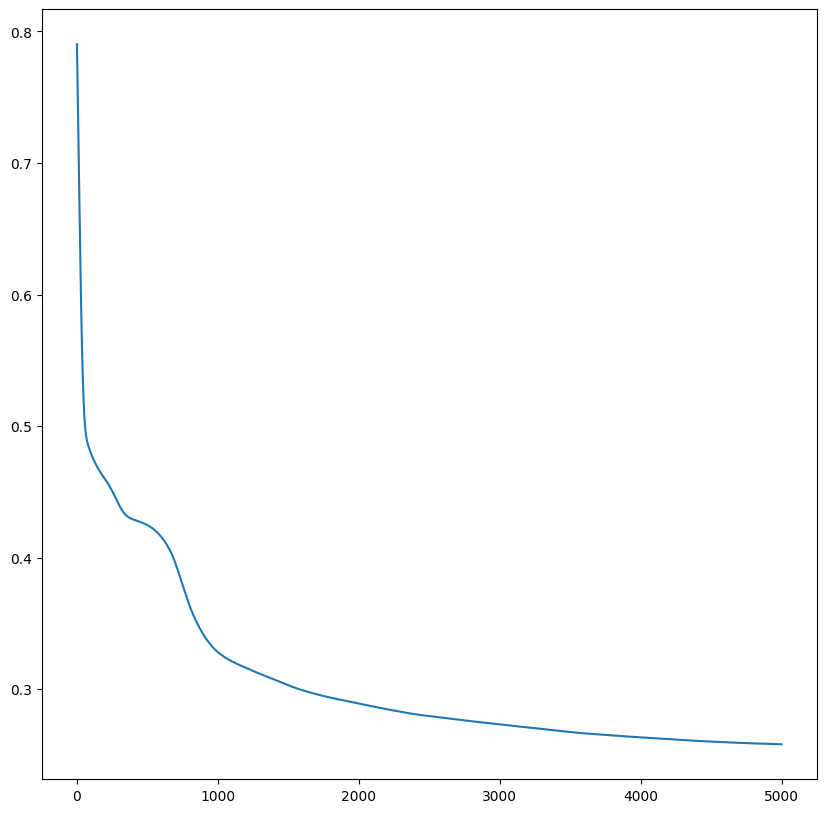

In [81]:
plt.figure(figsize=(10, 10))
plt.plot(histogram["Epoch"], histogram["Loss"], label='Loss')

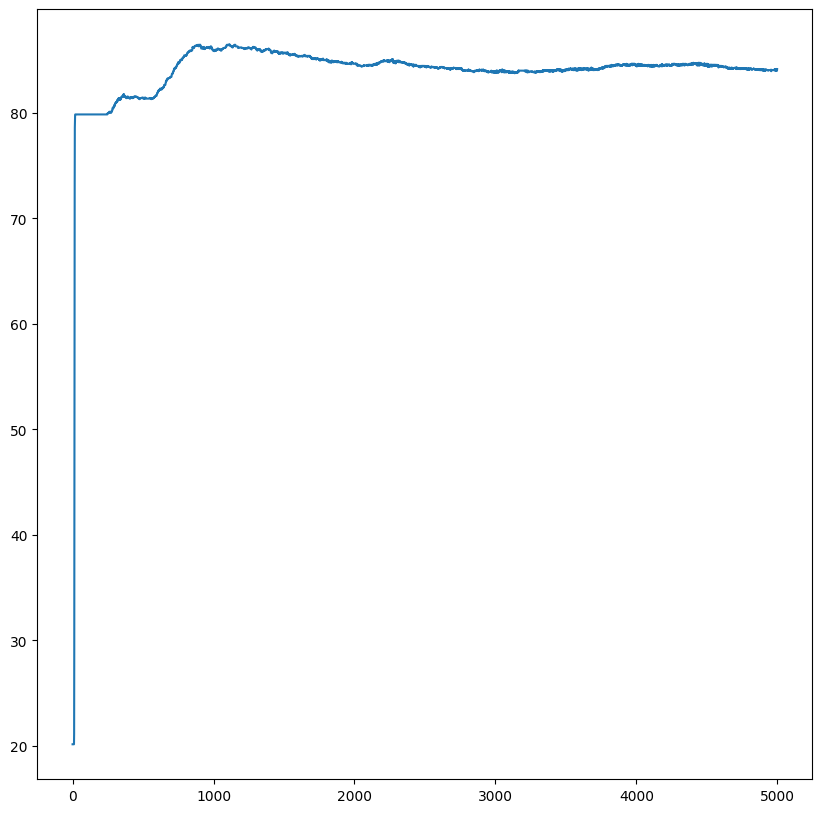

In [82]:
plt.figure(figsize=(10, 10))
plt.plot(histogram["Epoch"], histogram["Accuracy"], label='Accuracy')